In [1]:
from pathlib import Path
import sys
sys.path.append("c:\\Users\\kpdav\\machine_learning\\projects\\PGA-portfolio-optimizer\\config")
sys.path.append("c:\\Users\\kpdav\\machine_learning\\projects\\PGA-portfolio-optimizer\\src\\data")

import config

import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
timeseries_feature_path = str(Path(config.TIMESERIES_FRAMEWORK_DIR, "ts_feature_store.csv"))
df = pd.read_csv(timeseries_feature_path, parse_dates=["date"])

In [3]:
df.head()

,player_id,tournament_id,date,round_1_1,round_1_2,round_1_3,round_1_4,round_1_5,round_1_6,round_1_7,round_1_8,round_1_9,round_1_10,round_1_11,round_1_12,round_1_13,round_1_14,round_1_15,round_1_16,round_1_17,round_1_18,round_2_1,round_2_2,round_2_3,round_2_4,round_2_5,round_2_6,round_2_7,round_2_8,round_2_9,round_2_10,round_2_11,round_2_12,round_2_13,round_2_14,round_2_15,round_2_16,round_2_17,round_2_18,round_3_1,round_3_2,round_3_3,round_3_4,round_3_5,round_3_6,round_3_7,round_3_8,round_3_9,round_3_10,round_3_11,round_3_12,round_3_13,round_3_14,round_3_15,round_3_16,round_3_17,round_3_18,round_4_1,round_4_2,round_4_3,round_4_4,round_4_5,round_4_6,round_4_7,round_4_8,round_4_9,round_4_10,round_4_11,round_4_12,round_4_13,round_4_14,round_4_15,round_4_16,round_4_17,round_4_18,round_1_1_pts,round_1_2_pts,round_1_3_pts,round_1_4_pts,round_1_5_pts,round_1_6_pts,round_1_7_pts,round_1_8_pts,round_1_9_pts,round_1_10_pts,round_1_11_pts,round_1_12_pts,round_1_13_pts,round_1_14_pts,round_1_15_pts,round_1_16_pts,round_1_17_pts,round_1_18_pts,round_2_1_pts,round_2_2_pts,round_2_3_pts,round_2_4_pts,round_2_5_pts,round_2_6_pts,round_2_7_pts,round_2_8_pts,round_2_9_pts,round_2_10_pts,round_2_11_pts,round_2_12_pts,round_2_13_pts,round_2_14_pts,round_2_15_pts,round_2_16_pts,round_2_17_pts,round_2_18_pts,round_3_1_pts,round_3_2_pts,round_3_3_pts,round_3_4_pts,round_3_5_pts,round_3_6_pts,round_3_7_pts,round_3_8_pts,round_3_9_pts,round_3_10_pts,round_3_11_pts,round_3_12_pts,round_3_13_pts,round_3_14_pts,round_3_15_pts,round_3_16_pts,round_3_17_pts,round_3_18_pts,round_4_1_pts,round_4_2_pts,round_4_3_pts,round_4_4_pts,round_4_5_pts,round_4_6_pts,round_4_7_pts,round_4_8_pts,round_4_9_pts,round_4_10_pts,round_4_11_pts,round_4_12_pts,round_4_13_pts,round_4_14_pts,round_4_15_pts,round_4_16_pts,round_4_17_pts,round_4_18_pts,make_cut,total,place,fantasy_placing_pts,f_pts_1_1,f_pts_1_2,f_pts_1_3,f_pts_1_4,f_pts_1_5,f_pts_1_6,f_pts_1_7,f_pts_1_8,f_pts_1_9,f_pts_1_10,f_pts_1_11,f_pts_1_12,f_pts_1_13,f_pts_1_14,f_pts_1_15,f_pts_1_16,f_pts_1_17,f_pts_1_18,f_pts_2_1,f_pts_2_2,f_pts_2_3,f_pts_2_4,f_pts_2_5,f_pts_2_6,f_pts_2_7,f_pts_2_8,f_pts_2_9,f_pts_2_10,f_pts_2_11,f_pts_2_12,f_pts_2_13,f_pts_2_14,f_pts_2_15,f_pts_2_16,f_pts_2_17,f_pts_2_18,f_pts_3_1,f_pts_3_2,f_pts_3_3,f_pts_3_4,f_pts_3_5,f_pts_3_6,f_pts_3_7,f_pts_3_8,f_pts_3_9,f_pts_3_10,f_pts_3_11,f_pts_3_12,f_pts_3_13,f_pts_3_14,f_pts_3_15,f_pts_3_16,f_pts_3_17,f_pts_3_18,f_pts_4_1,f_pts_4_2,f_pts_4_3,f_pts_4_4,f_pts_4_5,f_pts_4_6,f_pts_4_7,f_pts_4_8,f_pts_4_9,f_pts_4_10,f_pts_4_11,f_pts_4_12,f_pts_4_13,f_pts_4_14,f_pts_4_15,f_pts_4_16,f_pts_4_17,f_pts_4_18,fantasy_hole_score_pts,complete_r1,complete_r2,complete_r3,complete_r4,bf1,bf2,bf3,bf4,fantasy_bogeyfree_pts,birdie_streak_r1,birdie_streak_r2,birdie_streak_r3,birdie_streak_r4,fantasy_birdie_streak_pts,fantasy_hole_in_one_pts,rd_total_1,rd_total_2,rd_total_3,rd_total_4,under70_1,under70_2,under70_3,under70_4,fantasy_under70_pts,fantasy_total_points,last_win,days_since_win,last_top_3,days_since_top_3,last_top_5,days_since_top_5,last_top_7,days_since_top_7,last_top_9,days_since_top_9,last_top_11,days_since_top_11,last_top_13,days_since_top_13,last_top_15,days_since_top_15,last_top_17,days_since_top_17,last_top_19,days_since_top_19,last_top_21,days_since_top_21,last_top_23,days_since_top_23,last_top_25,days_since_top_25,last_top_27,days_since_top_27,last_top_29,days_since_top_29,last_top_31,days_since_top_31,last_top_33,days_since_top_33,last_top_35,days_since_top_35,last_top_37,days_since_top_37,last_top_39,days_since_top_39,last_top_41,days_since_top_41,last_top_43,days_since_top_43,last_top_45,days_since_top_45,last_top_47,days_since_top_47,last_top_49,days_since_top_49,made_cut,finished_r1,finished_r2,finished_r3,finished_r4,birdie_to_par_ratio,birdie_to_bogey_ratio,birdie_to_double_ratio,eagle_to_par_ratio,eagle_to_bogey_ratio,eagle_to_double_ratio,par_to_birdie_ratio,par_to_bogey_ratio,par_to_double_ratio,eagle_pct,birdie_pct,par_pct,bogey_pct,dou

In [4]:
df.tail()

,player_id,tournament_id,date,round_1_1,round_1_2,round_1_3,round_1_4,round_1_5,round_1_6,round_1_7,round_1_8,round_1_9,round_1_10,round_1_11,round_1_12,round_1_13,round_1_14,round_1_15,round_1_16,round_1_17,round_1_18,round_2_1,round_2_2,round_2_3,round_2_4,round_2_5,round_2_6,round_2_7,round_2_8,round_2_9,round_2_10,round_2_11,round_2_12,round_2_13,round_2_14,round_2_15,round_2_16,round_2_17,round_2_18,round_3_1,round_3_2,round_3_3,round_3_4,round_3_5,round_3_6,round_3_7,round_3_8,round_3_9,round_3_10,round_3_11,round_3_12,round_3_13,round_3_14,round_3_15,round_3_16,round_3_17,round_3_18,round_4_1,round_4_2,round_4_3,round_4_4,round_4_5,round_4_6,round_4_7,round_4_8,round_4_9,round_4_10,round_4_11,round_4_12,round_4_13,round_4_14,round_4_15,round_4_16,round_4_17,round_4_18,round_1_1_pts,round_1_2_pts,round_1_3_pts,round_1_4_pts,round_1_5_pts,round_1_6_pts,round_1_7_pts,round_1_8_pts,round_1_9_pts,round_1_10_pts,round_1_11_pts,round_1_12_pts,round_1_13_pts,round_1_14_pts,round_1_15_pts,round_1_16_pts,round_1_17_pts,round_1_18_pts,round_2_1_pts,round_2_2_pts,round_2_3_pts,round_2_4_pts,round_2_5_pts,round_2_6_pts,round_2_7_pts,round_2_8_pts,round_2_9_pts,round_2_10_pts,round_2_11_pts,round_2_12_pts,round_2_13_pts,round_2_14_pts,round_2_15_pts,round_2_16_pts,round_2_17_pts,round_2_18_pts,round_3_1_pts,round_3_2_pts,round_3_3_pts,round_3_4_pts,round_3_5_pts,round_3_6_pts,round_3_7_pts,round_3_8_pts,round_3_9_pts,round_3_10_pts,round_3_11_pts,round_3_12_pts,round_3_13_pts,round_3_14_pts,round_3_15_pts,round_3_16_pts,round_3_17_pts,round_3_18_pts,round_4_1_pts,round_4_2_pts,round_4_3_pts,round_4_4_pts,round_4_5_pts,round_4_6_pts,round_4_7_pts,round_4_8_pts,round_4_9_pts,round_4_10_pts,round_4_11_pts,round_4_12_pts,round_4_13_pts,round_4_14_pts,round_4_15_pts,round_4_16_pts,round_4_17_pts,round_4_18_pts,make_cut,total,place,fantasy_placing_pts,f_pts_1_1,f_pts_1_2,f_pts_1_3,f_pts_1_4,f_pts_1_5,f_pts_1_6,f_pts_1_7,f_pts_1_8,f_pts_1_9,f_pts_1_10,f_pts_1_11,f_pts_1_12,f_pts_1_13,f_pts_1_14,f_pts_1_15,f_pts_1_16,f_pts_1_17,f_pts_1_18,f_pts_2_1,f_pts_2_2,f_pts_2_3,f_pts_2_4,f_pts_2_5,f_pts_2_6,f_pts_2_7,f_pts_2_8,f_pts_2_9,f_pts_2_10,f_pts_2_11,f_pts_2_12,f_pts_2_13,f_pts_2_14,f_pts_2_15,f_pts_2_16,f_pts_2_17,f_pts_2_18,f_pts_3_1,f_pts_3_2,f_pts_3_3,f_pts_3_4,f_pts_3_5,f_pts_3_6,f_pts_3_7,f_pts_3_8,f_pts_3_9,f_pts_3_10,f_pts_3_11,f_pts_3_12,f_pts_3_13,f_pts_3_14,f_pts_3_15,f_pts_3_16,f_pts_3_17,f_pts_3_18,f_pts_4_1,f_pts_4_2,f_pts_4_3,f_pts_4_4,f_pts_4_5,f_pts_4_6,f_pts_4_7,f_pts_4_8,f_pts_4_9,f_pts_4_10,f_pts_4_11,f_pts_4_12,f_pts_4_13,f_pts_4_14,f_pts_4_15,f_pts_4_16,f_pts_4_17,f_pts_4_18,fantasy_hole_score_pts,complete_r1,complete_r2,complete_r3,complete_r4,bf1,bf2,bf3,bf4,fantasy_bogeyfree_pts,birdie_streak_r1,birdie_streak_r2,birdie_streak_r3,birdie_streak_r4,fantasy_birdie_streak_pts,fantasy_hole_in_one_pts,rd_total_1,rd_total_2,rd_total_3,rd_total_4,under70_1,under70_2,under70_3,under70_4,fantasy_under70_pts,fantasy_total_points,last_win,days_since_win,last_top_3,days_since_top_3,last_top_5,days_since_top_5,last_top_7,days_since_top_7,last_top_9,days_since_top_9,last_top_11,days_since_top_11,last_top_13,days_since_top_13,last_top_15,days_since_top_15,last_top_17,days_since_top_17,last_top_19,days_since_top_19,last_top_21,days_since_top_21,last_top_23,days_since_top_23,last_top_25,days_since_top_25,last_top_27,days_since_top_27,last_top_29,days_since_top_29,last_top_31,days_since_top_31,last_top_33,days_since_top_33,last_top_35,days_since_top_35,last_top_37,days_since_top_37,last_top_39,days_since_top_39,last_top_41,days_since_top_41,last_top_43,days_since_top_43,last_top_45,days_since_top_45,last_top_47,days_since_top_47,last_top_49,days_since_top_49,made_cut,finished_r1,finished_r2,finished_r3,finished_r4,birdie_to_par_ratio,birdie_to_bogey_ratio,birdie_to_double_ratio,eagle_to_par_ratio,eagle_to_bogey_ratio,eagle_to_double_ratio,par_to_birdie_ratio,par_to_bogey_ratio,par_to_double_ratio,eagle_pct,birdie_pct,par_pct,bogey_pct,dou

# 1. Recode 2 variables into new categories.

__What I did__

I took fantasy_hole_score_pts and made four bins. Each bin is representative of a quantile. The first bin includes all values less than 25% of the data. The second bin ranges from values greater than 25% of the data and less than 50% of the data. The third bin ranges from values greater than 50% of the data and less than 75% of the data. The fourth bin ranges from values greater than 75% of the data to 100% of the data. 

__Explain the variable(s)__

In [5]:
df.fantasy_hole_score_pts.describe()

count    17750.000000
mean        48.466817
std         23.469955
min         -4.000000
25%         26.000000
50%         51.500000
75%         68.000000
max        118.500000
Name: fantasy_hole_score_pts, dtype: float64

In [18]:
conditions = [
    (df["fantasy_hole_score_pts"] < 26),
    ((df["fantasy_hole_score_pts"] >= 26) & (df["fantasy_hole_score_pts"] < 51.5)),
    ((df["fantasy_hole_score_pts"] >=51.5) & (df["fantasy_hole_score_pts"] < 68)),
    ((df["fantasy_hole_score_pts"] >=68) & (df["fantasy_hole_score_pts"]))
]
choices = [4, 3, 2, 1]
df["player_tier"] = np.select(conditions, choices, default=np.nan)

In [20]:
df.player_tier.describe()

count    17750.000000
mean         2.481239
std          1.121933
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: player_tier, dtype: float64

In [21]:
df.player_tier.value_counts()

1.0    4601
3.0    4435
2.0    4360
4.0    4354
Name: player_tier, dtype: int64

In [22]:
res = pd.crosstab(df["fantasy_hole_score_pts"], df["player_tier"])
res.astype("float").div(res.sum(axis=0), axis=1)

player_tier,1.0,2.0,3.0,4.0
fantasy_hole_score_pts,,,,
-4.0,0.000000,0.0,0.0,0.000230
-3.0,0.000000,0.0,0.0,0.000230
-2.5,0.000000,0.0,0.0,0.000689
-2.0,0.000000,0.0,0.0,0.000230
-1.5,0.000000,0.0,0.0,0.000230
...,...,...,...,...
111.0,0.000217,0.0,0.0,0.000000
111.5,0.000217,0.0,0.0,0.000000
112.5,0.000435,0.0,0.0,0.000000


In [6]:
pd.qcut(df.fantasy_hole_score_pts, q=4)

0          (26.0, 51.5]
1        (-4.001, 26.0]
2          (26.0, 51.5]
3          (26.0, 51.5]
4          (26.0, 51.5]
              ...      
17745      (51.5, 68.0]
17746    (-4.001, 26.0]
17747    (-4.001, 26.0]
17748      (26.0, 51.5]
17749      (26.0, 51.5]
Name: fantasy_hole_score_pts, Length: 17750, dtype: category
Categories (4, interval[float64]): [(-4.001, 26.0] < (26.0, 51.5] < (51.5, 68.0] < (68.0, 118.5]]

In [7]:
df["tier_q"] = pd.qcut(df.fantasy_hole_score_pts, q=4, labels=["Tier_4", "Tier_3", "Tier_2", "Tier_1"])


In [8]:
df[["fantasy_hole_score_pts","tier_q"]]

,fantasy_hole_score_pts,tier_q
0,28.5,Tier_3
1,25.0,Tier_4
2,29.5,Tier_3
3,31.0,Tier_3
4,28.5,Tier_3
...,...,...
17745,52.5,Tier_2
17746,0.5,Tier_4
17747,7.5,Tier_4
17748,37.5,Tier_3


In [9]:
df["tier_q"].value_counts()

Tier_4    4560
Tier_2    4437
Tier_1    4430
Tier_3    4323
Name: tier_q, dtype: int64

In [10]:
df["tier_q"].describe()

count      17750
unique         4
top       Tier_4
freq        4560
Name: tier_q, dtype: object

In [11]:
res = pd.crosstab(df["fantasy_hole_score_pts"], df["tier_q"])
res.astype("float").div(res.sum(axis=0), axis=1)

tier_q,Tier_4,Tier_3,Tier_2,Tier_1
fantasy_hole_score_pts,,,,
-4.0,0.000219,0.0,0.0,0.000000
-3.0,0.000219,0.0,0.0,0.000000
-2.5,0.000658,0.0,0.0,0.000000
-2.0,0.000219,0.0,0.0,0.000000
-1.5,0.000219,0.0,0.0,0.000000
...,...,...,...,...
111.0,0.000000,0.0,0.0,0.000226
111.5,0.000000,0.0,0.0,0.000226
112.5,0.000000,0.0,0.0,0.000451


Second variable recode. The variable I am choosing is fantasy_birdie_streak_pts. I will indicate 1 when a player has a value of 6 or higher and 0 otherwise (3 or 0 points would have been recorded for that player).

In [12]:
conditions = [
    (df["fantasy_birdie_streak_pts"] >=6),
    (df["fantasy_birdie_streak_pts"] < 6)
]
choices = [1, 0]
df["high_birdies"] = np.select(conditions, choices, default=np.nan)

Check that the computation proceeded correctly.

In [13]:
res = pd.crosstab(df.fantasy_birdie_streak_pts, df.high_birdies)
res.astype("float").div(res.sum(axis=0), axis=1)

high_birdies,0.0,1.0
fantasy_birdie_streak_pts,,
0,0.776787,0.000000
3,0.223213,0.000000
6,0.000000,0.881356
9,0.000000,0.112994
12,0.000000,0.005650


array([[<AxesSubplot:title={'center':'high_birdies'}>]], dtype=object)

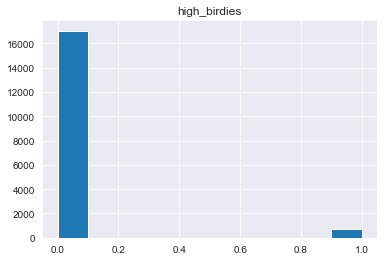

In [14]:
df.hist(column="high_birdies")

# 2. Use one (or both) of your recoded variables to do a cross-tabulation

In [24]:
res = pd.crosstab(df.high_birdies, df.player_tier)
res.astype("float").div(res.sum(axis=0), axis=1)

player_tier,1.0,2.0,3.0,4.0
high_birdies,,,,
0.0,0.872636,0.975688,0.996392,1.0
1.0,0.127364,0.024312,0.003608,0.0
